# LSTM Regression Model on Google and News Sentiment

Sources: 
- https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/
- https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/

Table of Contents:
- <a href='#section1'>Data Preprocessing</a>
    - <a href='#section1a'>Visualizing Data</a>
    - <a href='#section1b'>Splitting Data</a>
    - <a href='#section1c'>Scaling Data</a>
    - <a href='#section1d'>Creating Time Series Data</a>
- <a href='#section2'>Creating and Training LSTM Model using Keras</a>
- <a href='#section3'>Analyzing Results</a>

## Data Preprocessing<a id='section1'></a>
- Computing target feature 'middle' = ('high' + 'low') / 2

In [315]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/news_sentiment_augmented_google.csv').drop(['Unnamed: 0'], axis=1)

In [316]:
df['Middle'] = (df['Low'] + df['High']) / 2
df

,Date,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Open,High,Low,Close,Volume,OpenInt,Middle
0,2013-01-07,0.101266,0.088608,0.113924,0.050633,0.455696,0.113924,0.480690,0.176541,0.052167,...,0.329081,0.176808,2004.556962,367.72,369.69,365.29,367.38,3311534,0,367.490
1,2013-01-08,0.083333,0.166667,0.083333,0.000000,0.416667,0.166667,0.455641,0.161938,0.048414,...,0.338889,0.102778,1493.583333,367.77,368.15,362.22,366.65,3352074,0,365.185
2,2013-01-09,0.134831,0.191011,0.112360,0.033708,0.235955,0.123596,0.467116,0.145615,0.046497,...,0.385071,0.159139,2536.303371,366.50,369.18,364.30,369.06,4051302,0,366.740
3,2013-01-10,0.125000,0.187500,0.200000,0.012500,0.237500,0.062500,0.462260,0.156578,0.047305,...,0.389721,0.096425,2085.200000,371.42,372.50,366.75,370.74,3671560,0,369.625
4,2013-01-11,0.098039,0.137255,0.078431,0.058824,0.333333,0.156863,0.480836,0.166839,0.043516,...,0.329093,0.186686,3621.843137,371.00,371.22,368.15,370.00,2570250,0,369.685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,2014-12-19,0.067568,0.121622,0.121622,0.040541,0.081081,0.432432,0.349775,0.093596,0.029660,...,0.340203,0.138859,2476.770270,516.99,520.81,508.86,520.04,4872059,0,514.835
494,2014-12-22,0.097222,0.097222,0.125000,0.013889,0.083333,0.319444,0.384586,0.092461,0.029623,...,0.335687,0.181722,2348.555556,520.61,532.97,520.59,532.30,3319461,0,526.780
495,2014-12-23,0.049180,0.163934,0.032787,0.016393,0.131148,0.377049,0.377784,0.065058,0.030542,...,0.316924,0.136902,2862.983607,534.51,542.30,533.72,538.77,2877208,0,538.010
496,2014-12-24,0.057692,0.115385,0.076923,0.057692,0.115385,0.423077,0.352430,0.079892,0.027218,...,0.363923,0.132746,3544.038462,538.82,540.29,535.10,536.93,737848,0,537.695


## Visualize the data<a id='section1a'></a>

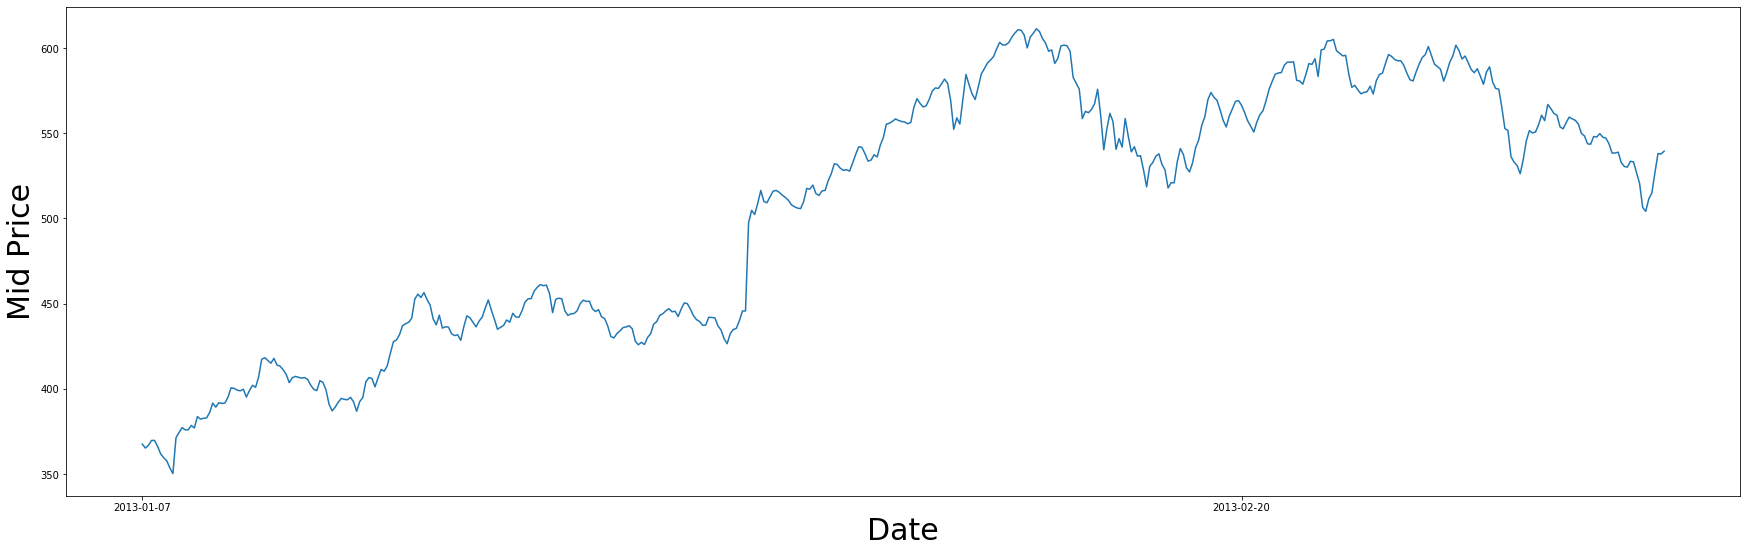

In [317]:
plt.figure(figsize = (30,9))
plt.plot(range(df.shape[0]), df['Middle'])
plt.xticks(range(0, df.shape[0], 359), df['Date'].loc[::30])
plt.xlabel('Date', fontsize=30)
plt.ylabel('Mid Price', fontsize=30)
plt.show()

In [318]:
df = df.drop(['Date'], axis=1)

## Training, Validation, Testing Split<a id='section1b'></a>
- 80%, 20%, 20% split

In [319]:
training_data = df[:300]
validation_data = df[300:400]
testing_data = df[400:]

training_data

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Open,High,Low,Close,Volume,OpenInt,Middle
0,0.101266,0.088608,0.113924,0.050633,0.455696,0.113924,0.480690,0.176541,0.052167,0.015850,...,0.329081,0.176808,2004.556962,367.72,369.69,365.29,367.38,3311534,0,367.490
1,0.083333,0.166667,0.083333,0.000000,0.416667,0.166667,0.455641,0.161938,0.048414,0.015218,...,0.338889,0.102778,1493.583333,367.77,368.15,362.22,366.65,3352074,0,365.185
2,0.134831,0.191011,0.112360,0.033708,0.235955,0.123596,0.467116,0.145615,0.046497,0.015021,...,0.385071,0.159139,2536.303371,366.50,369.18,364.30,369.06,4051302,0,366.740
3,0.125000,0.187500,0.200000,0.012500,0.237500,0.062500,0.462260,0.156578,0.047305,0.017239,...,0.389721,0.096425,2085.200000,371.42,372.50,366.75,370.74,3671560,0,369.625
4,0.098039,0.137255,0.078431,0.058824,0.333333,0.156863,0.480836,0.166839,0.043516,0.016712,...,0.329093,0.186686,3621.843137,371.00,371.22,368.15,370.00,2570250,0,369.685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.048387,0.145161,0.096774,0.048387,0.241935,0.241935,0.449543,0.108921,0.040155,0.019476,...,0.307310,0.184524,4981.161290,606.52,607.16,598.32,600.00,3430846,0,602.740
296,0.032787,0.163934,0.229508,0.032787,0.163934,0.262295,0.453458,0.109253,0.040083,0.018808,...,0.311149,0.148584,1957.475410,597.15,603.92,592.10,603.65,3933854,0,598.010
297,0.031250,0.140625,0.171875,0.046875,0.218750,0.234375,0.441970,0.100906,0.037052,0.017163,...,0.353050,0.112390,2599.671875,603.98,605.25,592.38,594.53,4691282,0,598.815
298,0.000000,0.078431,0.196078,0.058824,0.117647,0.176471,0.457235,0.116493,0.036585,0.017200,...,0.323362,0.232943,2969.725490,591.06,595.43,586.26,586.40,4603570,0,590.845


## Scaling Data<a id='section1c'></a>
- Applying MinMaxScaler over all features
- Note only fitting on training_data to prevent fitting on validation

In [320]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = pd.DataFrame(sc.fit_transform(training_data),
              columns=training_data.columns,
              dtype='float64')
validation_data_scaled = pd.DataFrame(sc.transform(validation_data),
              columns=training_data.columns,
              dtype='float64')
testing_data_scaled = pd.DataFrame(sc.transform(testing_data),
              columns=training_data.columns,
              dtype='float64')

In [321]:
training_data_scaled

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Open,High,Low,Close,Volume,OpenInt,Middle
0,0.543153,0.227605,0.197980,0.199553,0.787121,0.265384,0.801997,0.838543,1.000000,0.286567,...,0.591883,0.529864,0.032107,0.058995,0.065019,0.067026,0.061630,0.084954,0.0,0.066194
1,0.446970,0.512821,0.103237,0.000000,0.710903,0.404290,0.518249,0.697056,0.798920,0.219626,...,0.642715,0.143875,0.000000,0.059187,0.059136,0.055288,0.058808,0.086823,0.0,0.057362
2,0.723187,0.601772,0.193135,0.132849,0.358002,0.290855,0.648240,0.538887,0.696144,0.198793,...,0.882067,0.437738,0.065519,0.054318,0.063071,0.063241,0.068126,0.119051,0.0,0.063320
3,0.670455,0.588942,0.464567,0.049265,0.361019,0.129950,0.593227,0.645117,0.739473,0.433560,...,0.906167,0.110753,0.037174,0.073178,0.075754,0.072608,0.074621,0.101548,0.0,0.074375
4,0.525847,0.405354,0.088055,0.231834,0.548166,0.378470,0.803652,0.744541,0.536400,0.377849,...,0.591947,0.581366,0.133728,0.071568,0.070864,0.077961,0.071760,0.050788,0.0,0.074605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.259531,0.434243,0.144865,0.190702,0.369681,0.602523,0.449170,0.183346,0.356334,0.670336,...,0.479048,0.570092,0.219141,0.974393,0.972189,0.958018,0.961027,0.090454,0.0,0.967621
296,0.175857,0.502837,0.555957,0.129219,0.217357,0.656143,0.493522,0.186564,0.352439,0.599635,...,0.498946,0.382707,0.029149,0.938475,0.959812,0.934236,0.975139,0.113638,0.0,0.949497
297,0.167614,0.417668,0.377461,0.184743,0.324403,0.582611,0.363386,0.105685,0.190029,0.425558,...,0.716110,0.193989,0.069501,0.964657,0.964893,0.935306,0.939878,0.148548,0.0,0.952582
298,0.000000,0.190422,0.452421,0.231834,0.126965,0.430111,0.536312,0.256711,0.165015,0.429428,...,0.562241,0.822544,0.092753,0.915130,0.927379,0.911906,0.908444,0.144505,0.0,0.922042


## Creating Time Series Data<a id='section1d'></a>
- Creating "pairs" of data based on look_back variable.
- look_back refers to how many consecutive data points behind current predicting data point to count

In [322]:
def create_dataset(dataset, target_feature, look_back=1):
    dataX, dataY = [], []
    for i in range(look_back, len(dataset)):
        a = dataset.drop([target_feature], axis=1).iloc[i - look_back:i].values[0]
        dataX.append(a)
        dataY.append(dataset.iloc[i][target_feature])
        
    return np.array(dataX), np.array(dataY)

In [323]:
look_back = 1
trainX, trainY = create_dataset(training_data_scaled, 'Middle', look_back=look_back)
valX, valY = create_dataset(validation_data_scaled, 'Middle', look_back=look_back)

In [324]:
num_feat = trainX.shape[1]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, num_feat))
valX = np.reshape(valX, (valX.shape[0], look_back, num_feat))

## Creating and Training LSTM Model Using Keras<a id='section2'></a>

In [325]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(32, input_shape=(look_back, num_feat)))
model.add(Dense(1))

In [326]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
299/299 - 0s - loss: 0.0439
Epoch 2/100
299/299 - 0s - loss: 0.0017
Epoch 3/100
299/299 - 0s - loss: 9.4108e-04
Epoch 4/100
299/299 - 0s - loss: 7.1582e-04
Epoch 5/100
299/299 - 0s - loss: 6.6412e-04
Epoch 6/100
299/299 - 0s - loss: 5.4479e-04
Epoch 7/100
299/299 - 0s - loss: 6.1321e-04
Epoch 8/100
299/299 - 0s - loss: 6.3205e-04
Epoch 9/100
299/299 - 0s - loss: 6.4874e-04
Epoch 10/100
299/299 - 0s - loss: 5.8130e-04
Epoch 11/100
299/299 - 0s - loss: 5.7817e-04
Epoch 12/100
299/299 - 0s - loss: 5.7867e-04
Epoch 13/100
299/299 - 0s - loss: 6.1436e-04
Epoch 14/100
299/299 - 0s - loss: 5.9633e-04
Epoch 15/100
299/299 - 0s - loss: 6.1179e-04
Epoch 16/100
299/299 - 0s - loss: 5.3273e-04
Epoch 17/100
299/299 - 0s - loss: 5.8684e-04
Epoch 18/100
299/299 - 0s - loss: 6.2454e-04
Epoch 19/100
299/299 - 0s - loss: 6.6015e-04
Epoch 20/100
299/299 - 0s - loss: 4.9446e-04
Epoch 21/100
299/299 - 0s - loss: 5.0824e-04
Epoch 22/100
299/299 - 0s - loss: 5.4043e-04
Epoch 23/100
299/299 - 0s -

## Analyzing Results <a id='section3'></a>

In [327]:
def getPredictions(scaled_features, input_features, target_feature, look_back=1):
    scaled_training_results = model.predict(input_features)
    dummy_inputs = scaled_features.copy().iloc[look_back:]
    dummy_inputs[target_feature] = scaled_training_results
    
    results = sc.inverse_transform(dummy_inputs)
    unscaled_results = []
    for total in results:
        unscaled_results.append(total[len(total) - 1])
    
    return unscaled_results

In [328]:
training_results = getPredictions(training_data_scaled, trainX, 'Middle')

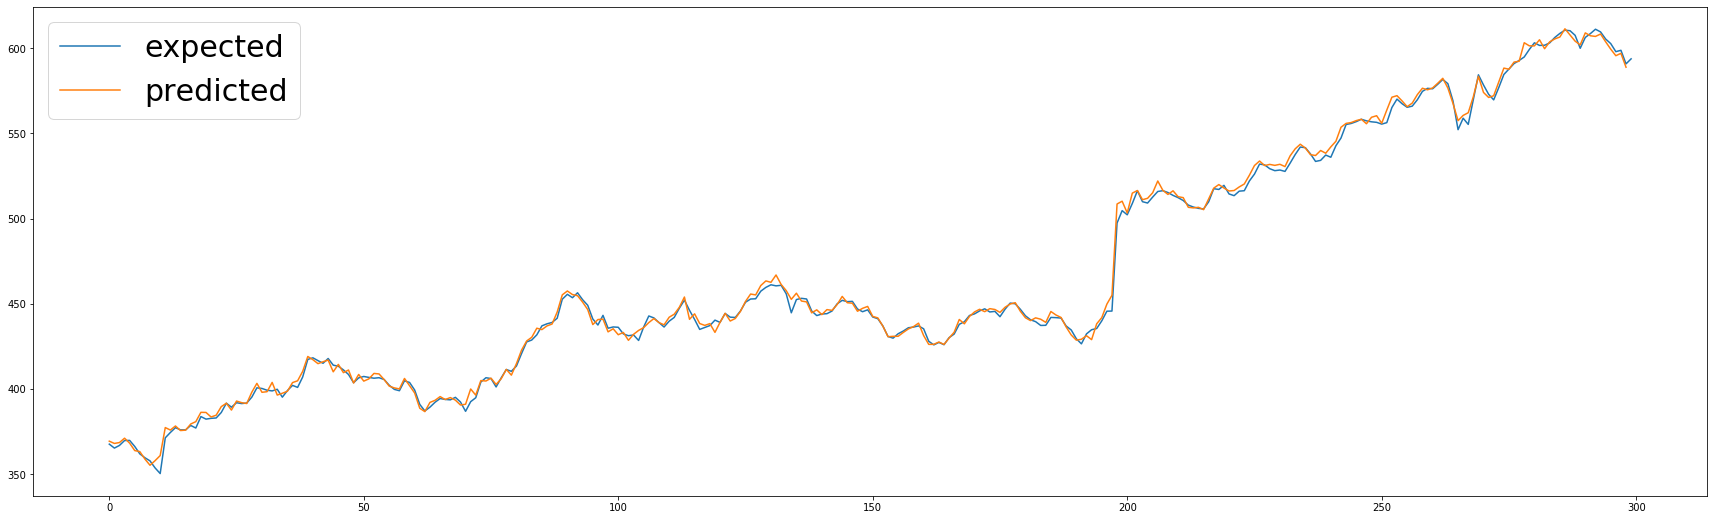

In [329]:
# Plot training data with known
plt.figure(figsize = (30,9))
plt.plot(range(training_data.shape[0]), training_data['Middle'], label='expected')
plt.plot(range(len(training_results)), training_results, label='predicted')
plt.legend(prop={'size': 30})
plt.show()

In [330]:
validation_results = getPredictions(validation_data_scaled, valX, 'Middle')

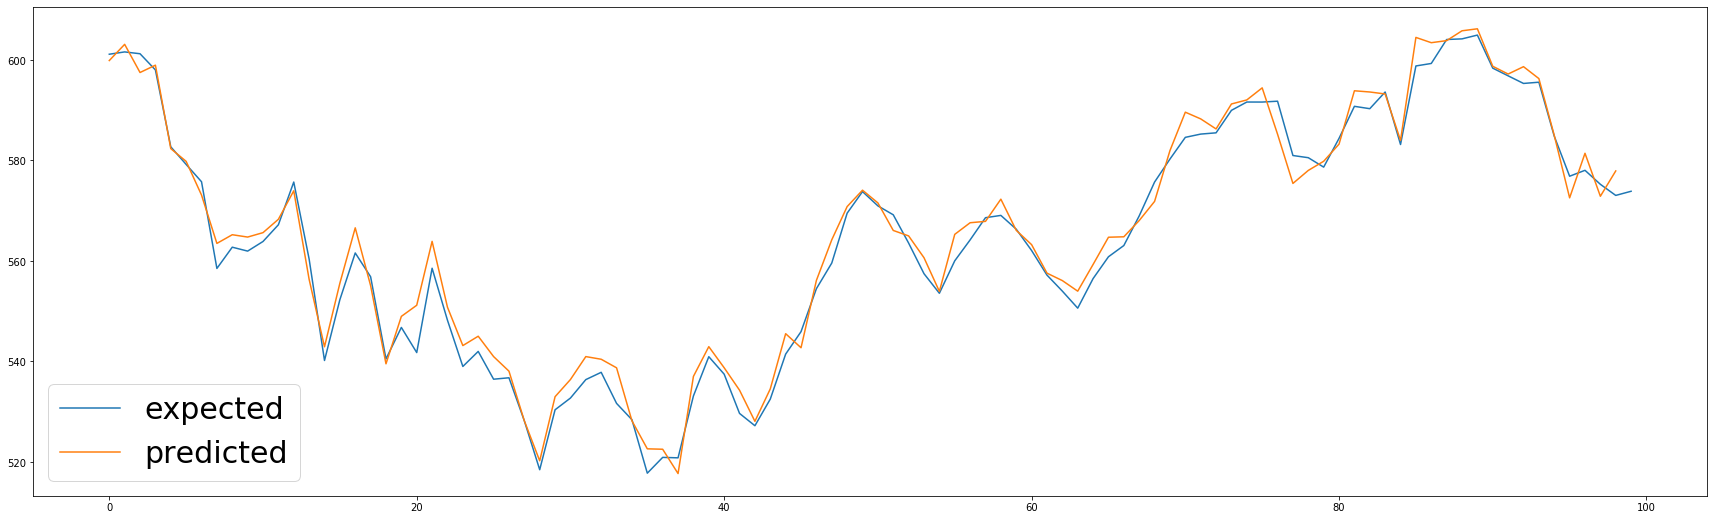

In [331]:
# Plot testing data with known
plt.figure(figsize = (30,9))
plt.plot(range(validation_data.shape[0]), validation_data['Middle'], label='expected')
plt.plot(range(len(validation_results)), validation_results, label='predicted')
plt.legend(prop={'size': 30})
plt.show()

In [332]:
total_expected = pd.concat([training_data, validation_data])
total_results = training_results + validation_results

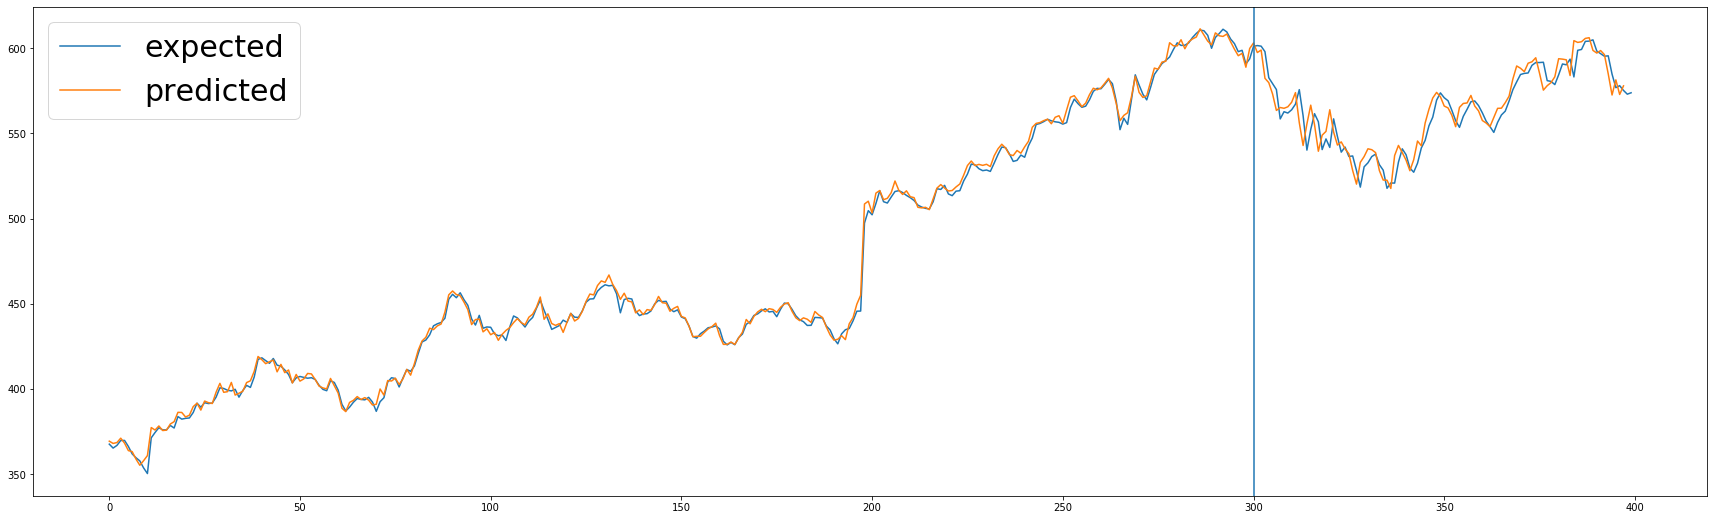

In [333]:
# Plot total data with known
plt.figure(figsize = (30,9))
plt.plot(range(total_expected.shape[0]), total_expected['Middle'], label='expected')
plt.plot(range(len(total_results)), total_results, label='predicted')
plt.legend(prop={'size': 30})
plt.axvline(x=300)
plt.show()